In [1]:
from keras.layers import Input, Dense, Flatten, Reshape
from sklearn.feature_extraction import image as sk_image
from keras.models import Model
import os
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from sklearn.cluster import AgglomerativeClustering
from scipy.signal import convolve2d
from sklearn.cluster import KMeans
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from pyhdf.SD import SD, SDC
import matplotlib as mpl
#tf.config.threading.set_inter_op_parallelism_threads(1)

from sklearn.feature_extraction.image import extract_patches_2d, reconstruct_from_patches_2d
from pyhdf.error import HDF4Error



In [2]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        # Currently, memory growth needs to be the same across GPUs
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)

bands = [6, 7, 20, 28, 28, 31]


1 Physical GPUs, 1 Logical GPUs


2023-09-14 13:36:23.493516: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 21336 MB memory:  -> device: 0, name: Quadro RTX 6000, pci bus id: 0000:25:00.0, compute capability: 7.5


In [3]:
from extract_training_data import extract_1km_data
extract_1km_data(folder="/uio/hume/student-u37/fslippe/data/cao/", bands = [6, 7, 20, 28, 28, 31],  save=None)

/uio/hume/student-u37/fslippe/data/cao/MOD021KM.A2021080.1305.061.2021081011309.hdf
0 Latitude
1 Longitude
2 EV_1KM_RefSB
3 EV_1KM_RefSB_Uncert_Indexes
4 EV_1KM_Emissive
5 EV_1KM_Emissive_Uncert_Indexes
6 EV_250_Aggr1km_RefSB
7 EV_250_Aggr1km_RefSB_Uncert_Indexes
8 EV_250_Aggr1km_RefSB_Samples_Used
9 EV_500_Aggr1km_RefSB
10 EV_500_Aggr1km_RefSB_Uncert_Indexes
11 EV_500_Aggr1km_RefSB_Samples_Used
12 Height
13 SensorZenith
14 SensorAzimuth
15 Range
16 SolarZenith
17 SolarAzimuth
18 gflags
19 EV_Band26
20 EV_Band26_Uncert_Indexes
21 Band_250M
22 Band_500M
23 Band_1KM_RefSB
24 Band_1KM_Emissive
25 Noise in Thermal Detectors
26 Change in relative responses of thermal detectors
27 DC Restore Change for Thermal Bands
28 DC Restore Change for Reflective 250m Bands
29 DC Restore Change for Reflective 500m Bands
30 DC Restore Change for Reflective 1km Bands
4


HDF4Error: SD: no such file

In [3]:
loaded = np.load('/uio/hume/student-u37/fslippe/data/training_data/training_data_20210421.npz')
X = [loaded[key] for key in loaded]
print(len(X))


X = [arr for arr in X if arr.shape[0] >= 64]

18


In [15]:
from autoencoder import SobelFilterLayer, SimpleAutoencoder

patch_size = 64
autoencoder = SimpleAutoencoder(len(bands), patch_size, patch_size)
#optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4)


autoencoder.fit(X, epochs=200, batch_size=64, optimizer="adam", threshold=0.09,loss="combined")
# print(X[0].shape)
# #autoencoder = simple_autoencoder([data_01], patch_size)
# autoencoder = simple_autoencoder(1, (2040, 1354), patch_size)    
# autoencoder.fit(X, epochs=5, batch_size=256)

SHAPE: (2030, 1354, 6)
SHAPE: (1470, 1354, 6)
SHAPE: (2030, 1354, 6)
SHAPE: (2030, 1354, 6)
SHAPE: (2030, 1354, 6)
SHAPE: (760, 1354, 6)
SHAPE: (1670, 1354, 6)
SHAPE: (550, 1354, 6)
SHAPE: (1830, 1354, 6)
SHAPE: (1260, 1354, 6)
SHAPE: (1100, 1354, 6)
SHAPE: (1510, 1354, 6)
SHAPE: (350, 1354, 6)
SHAPE: (2040, 1354, 6)
SHAPE: (1300, 1354, 6)
SHAPE: (2030, 1354, 6)
SHAPE: (2030, 1354, 6)
Patches shape:  (5952, 64, 64, 6)


2023-09-13 16:49:07.090349: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 585105408 exceeds 10% of free system memory.
2023-09-13 16:49:09.067101: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 585105408 exceeds 10% of free system memory.
2023-09-13 16:49:09.399307: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 585105408 exceeds 10% of free system memory.
2023-09-13 16:49:09.636264: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 585105408 exceeds 10% of free system memory.


Epoch 1/200


2023-09-13 16:49:13.986913: I tensorflow/stream_executor/cuda/cuda_dnn.cc:366] Loaded cuDNN version 8202


93/93 [==============================] - 6s 8ms/step - loss: 0.0397
Epoch 2/200
93/93 [==============================] - 1s 8ms/step - loss: 0.0174
Epoch 3/200
93/93 [==============================] - 1s 8ms/step - loss: 0.0154
Epoch 4/200
93/93 [==============================] - 1s 8ms/step - loss: 0.0141
Epoch 5/200
93/93 [==============================] - 1s 9ms/step - loss: 0.0135
Epoch 6/200
93/93 [==============================] - 1s 9ms/step - loss: 0.0132
Epoch 7/200
93/93 [==============================] - 1s 9ms/step - loss: 0.0130
Epoch 8/200
93/93 [==============================] - 1s 8ms/step - loss: 0.0129
Epoch 9/200
93/93 [==============================] - 1s 9ms/step - loss: 0.0127
Epoch 10/200
93/93 [==============================] - 1s 8ms/step - loss: 0.0126
Epoch 11/200
93/93 [==============================] - 1s 8ms/step - loss: 0.0125
Epoch 12/200
93/93 [==============================] - 1s 8ms/step - loss: 0.0122
Epoch 13/200
93/93 [=============================

In [17]:
autoencoder.autoencoder.save("/uio/hume/student-u37/fslippe/data/models/basic_autoencoder_20210421")
autoencoder.encoder.save("/uio/hume/student-u37/fslippe/data/models/basic_encoder_20210421")


2023-09-13 16:51:54.459534: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: /uio/hume/student-u37/fslippe/data/models/basic_autoencoder_20210421/assets
INFO:tensorflow:Assets written to: /uio/hume/student-u37/fslippe/data/models/basic_encoder_20210421/assets


In [4]:
from autoencoder import SobelFilterLayer, SimpleAutoencoder
patch_size = 64
from tensorflow.keras.models import load_model
autoencoder_predict = SimpleAutoencoder(len(bands), patch_size, patch_size)

encoder = load_model("/uio/hume/student-u37/fslippe/data/models/basic_encoder_20210421")

In [13]:
#autoencoder.autoencoder = model

X_test = autoencoder_predict.normalize(X[:10])
print(np.max(X[0]))
print(np.max(X_test[0]))

cluster_map = autoencoder_predict.kmeans(X_test, n_clusters=10, encoder=encoder)


53.72500141345958
1.0


/uio/hume/student-u37/fslippe/.local/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


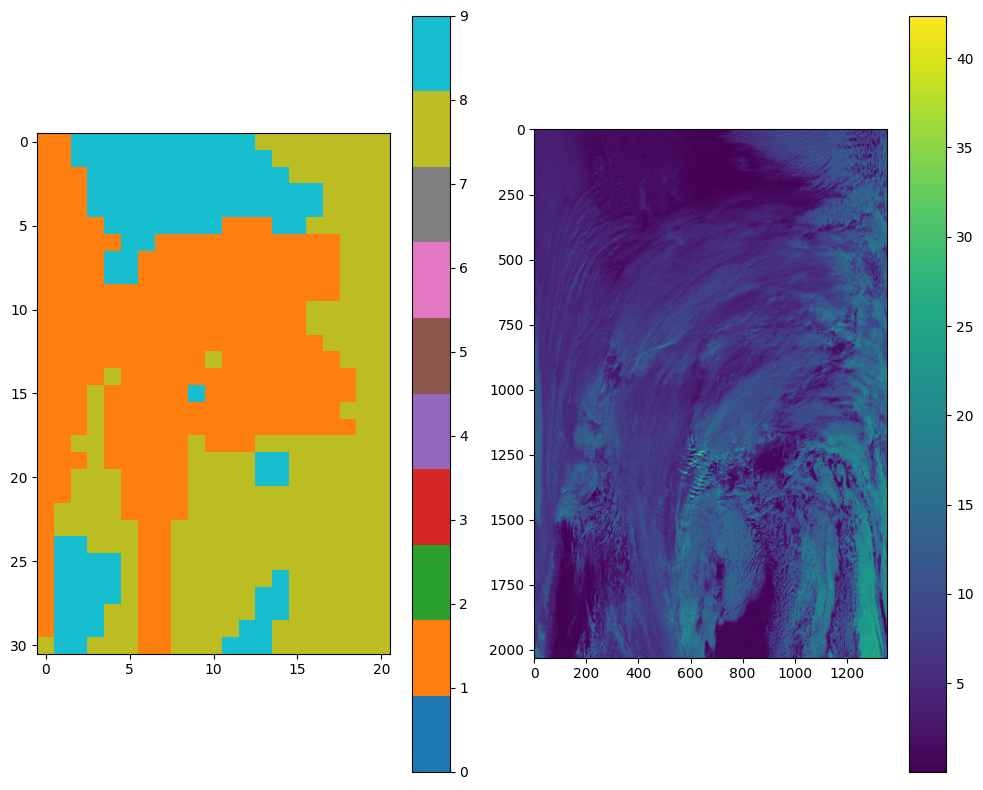

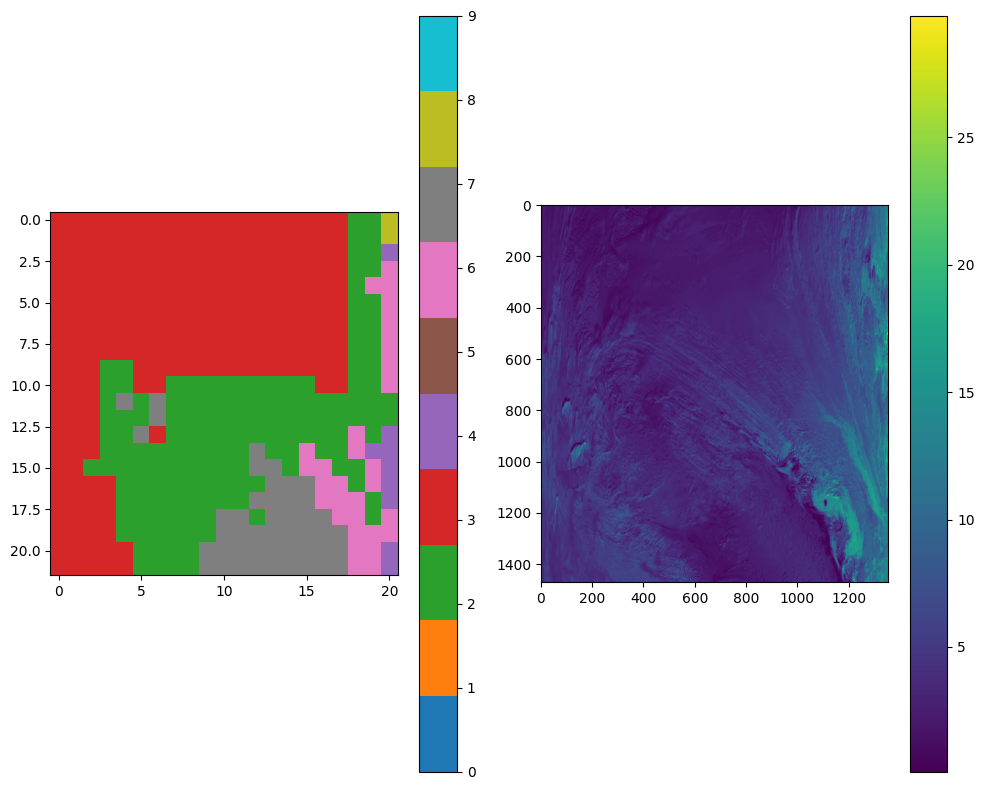

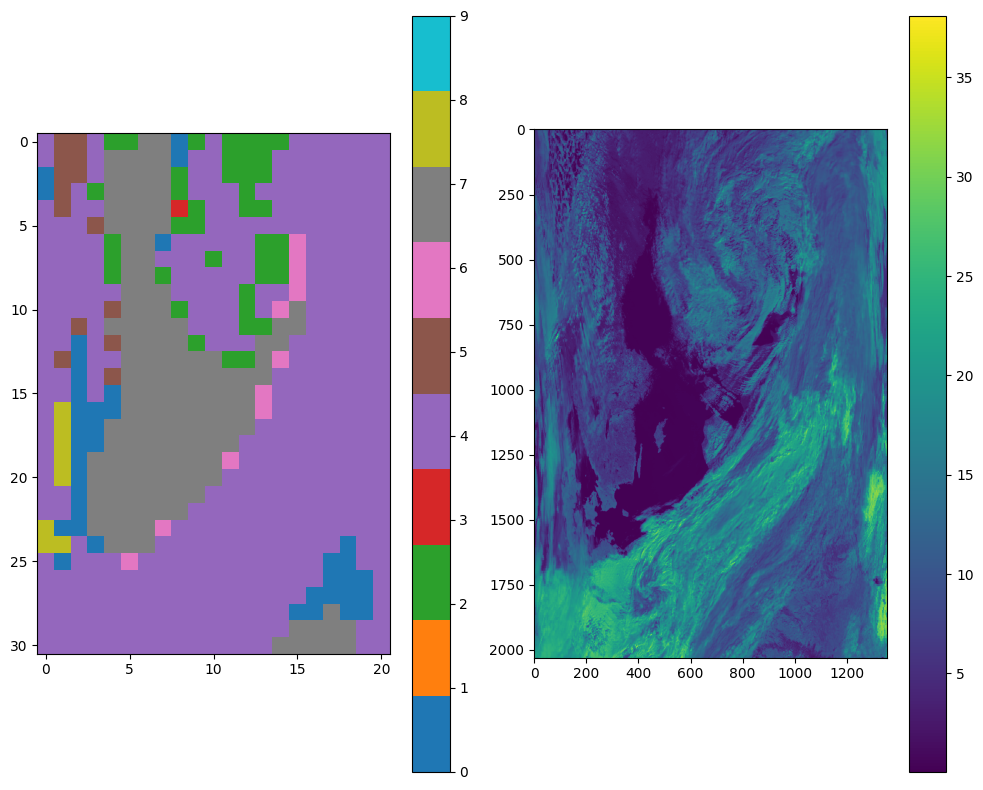

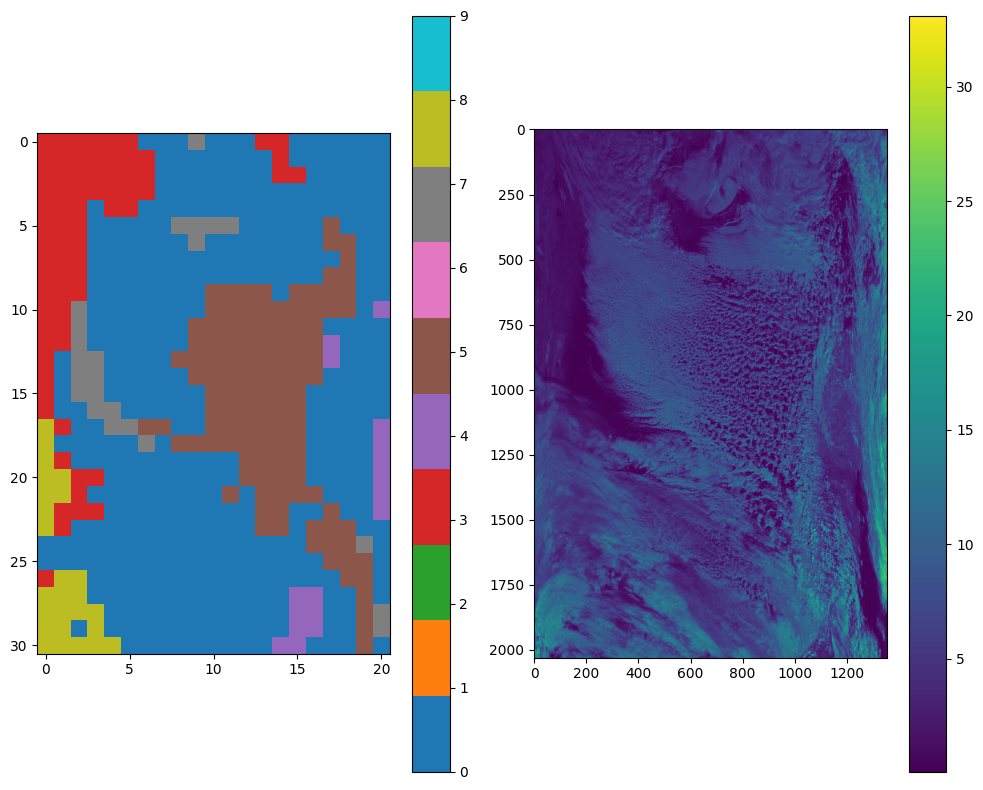

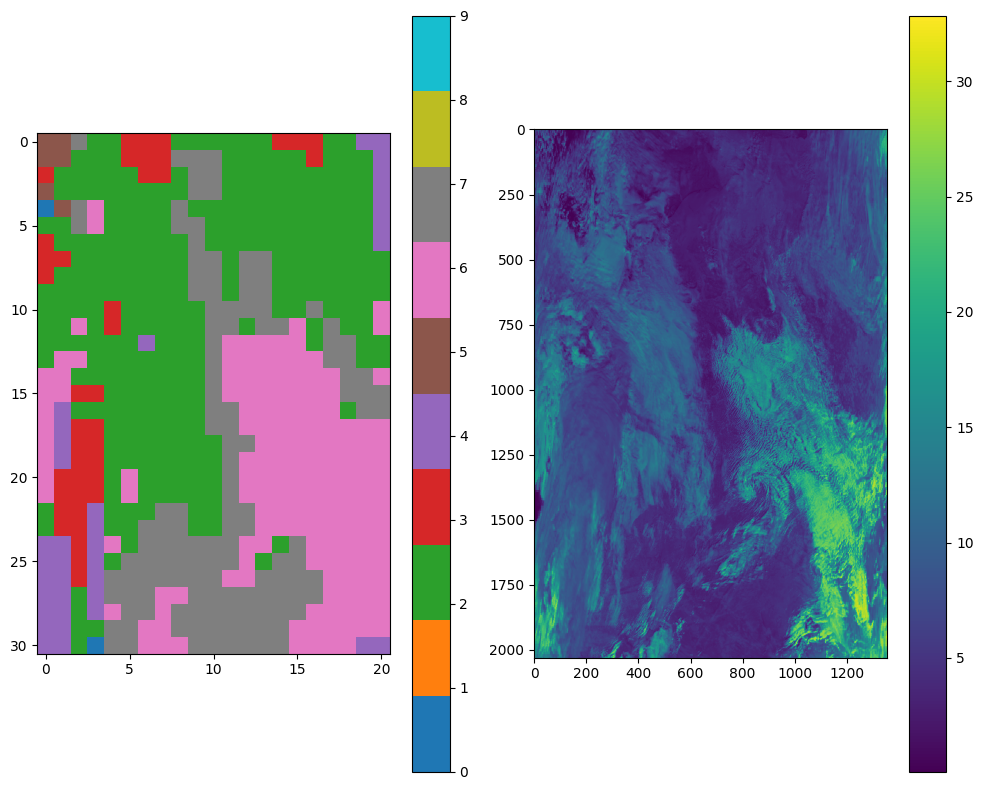

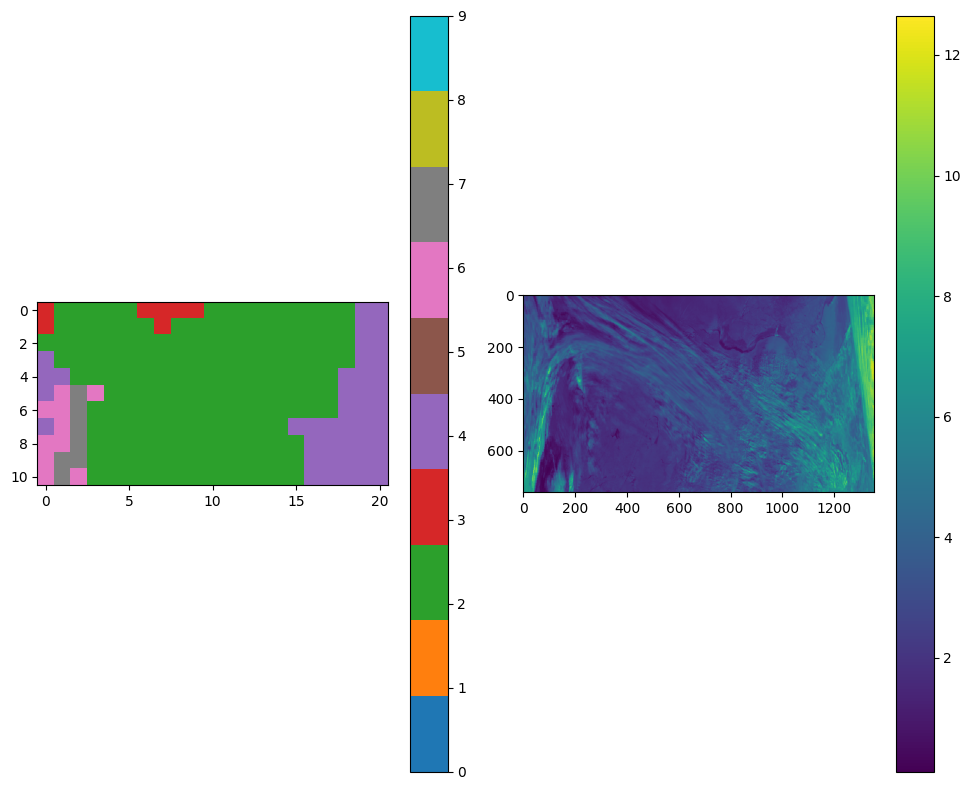

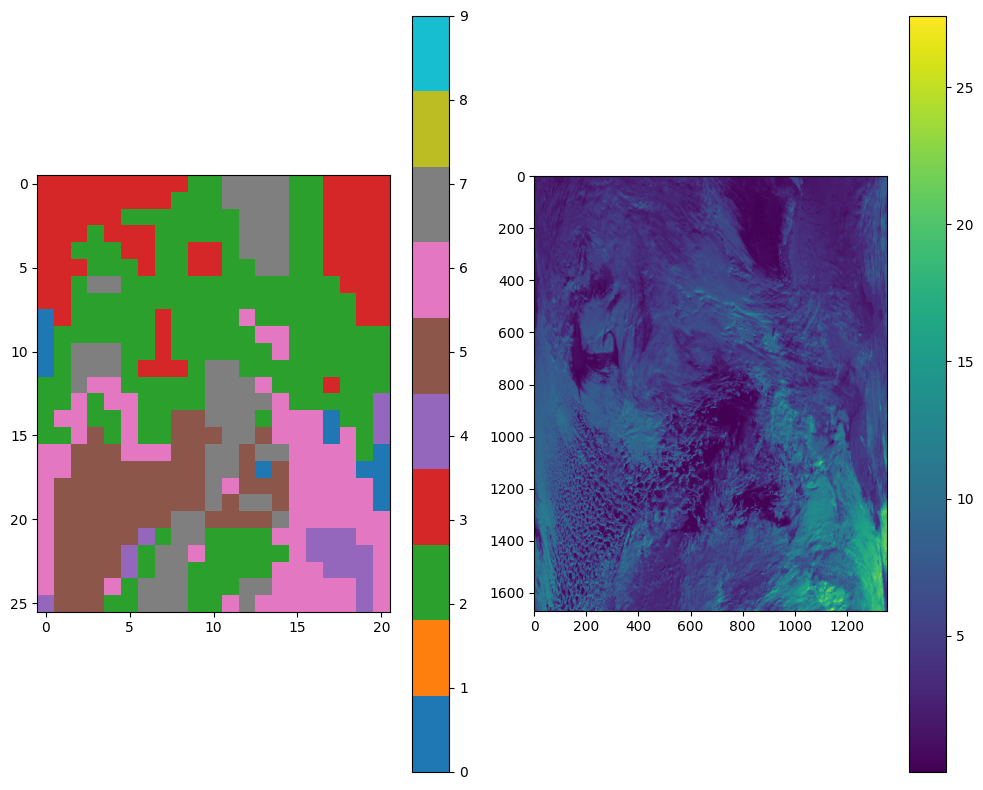

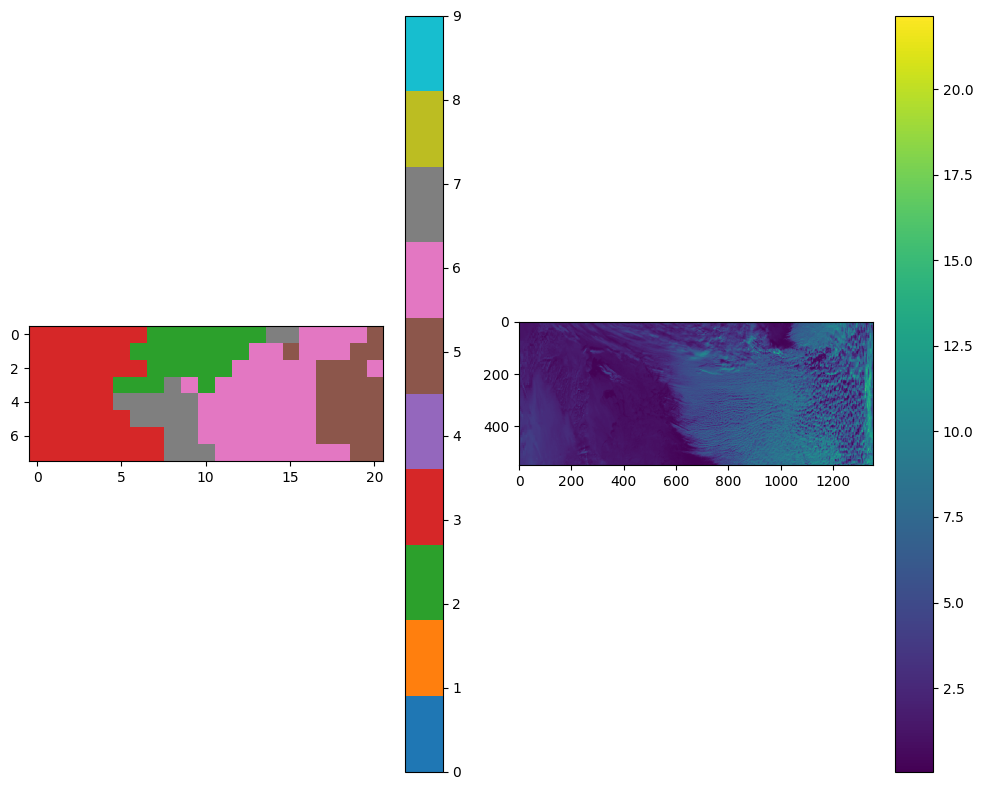

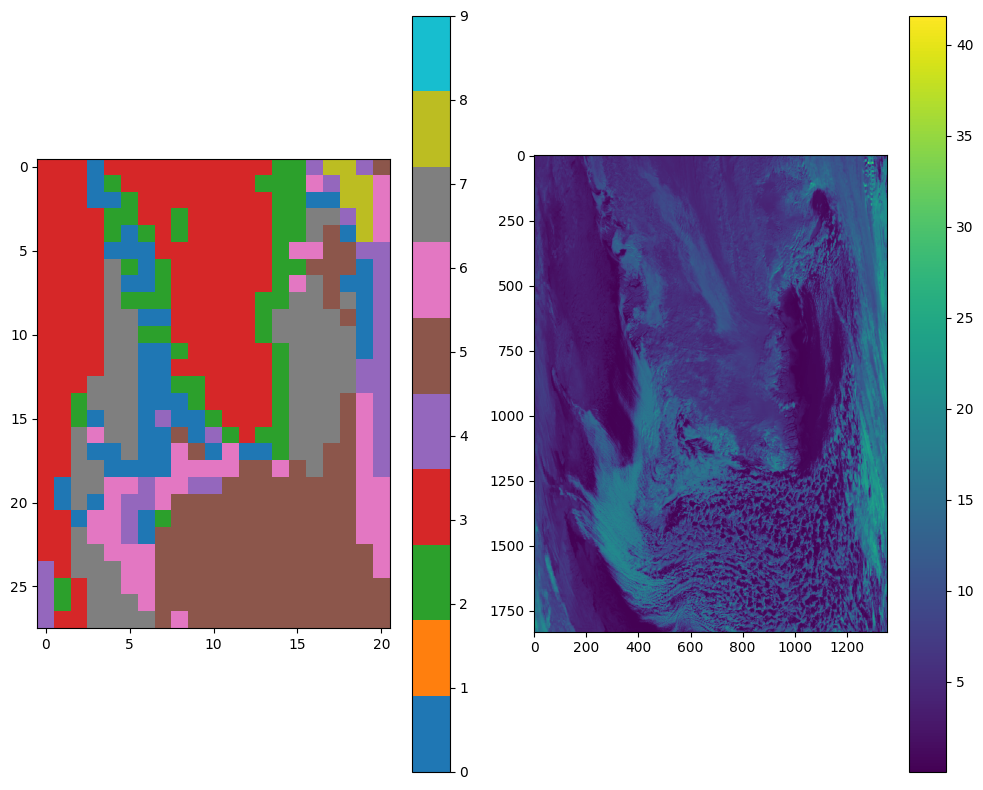

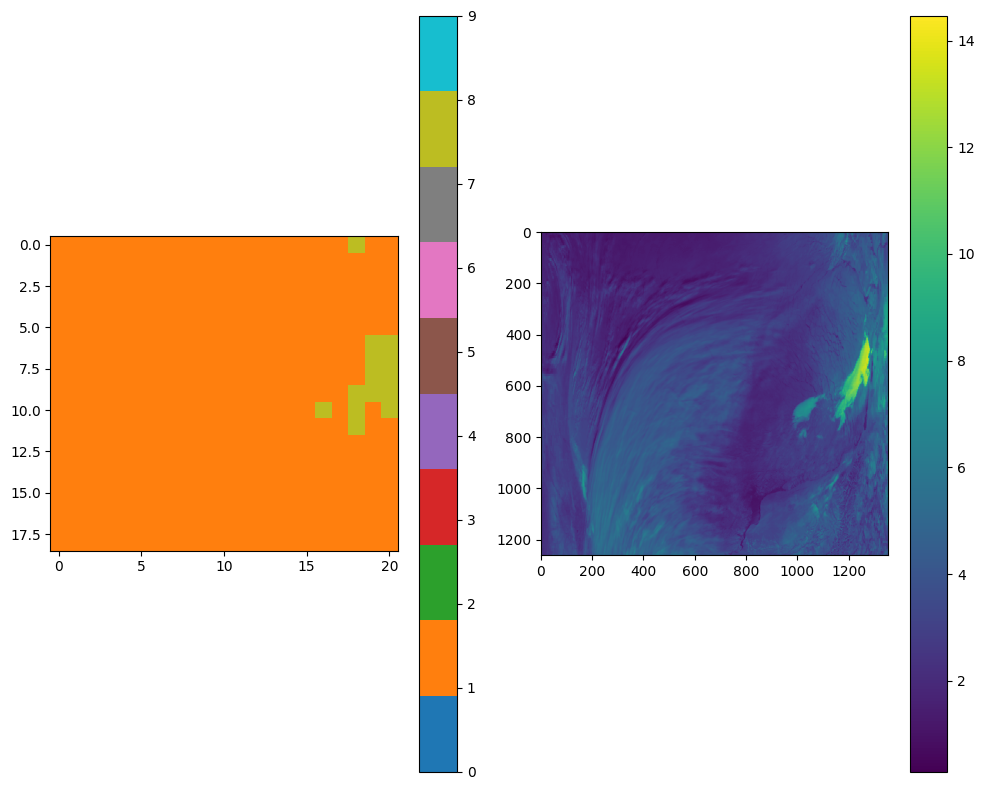

In [14]:
from matplotlib.colors import Normalize

# Determine global min and max labels
global_min = np.min([np.min(cm) for cm in cluster_map])
global_max = np.max([np.max(cm) for cm in cluster_map])

norm = Normalize(vmin=global_min, vmax=global_max)

for i in range(10):
    fig, axs = plt.subplots(1, 2, figsize=[10, 8])
    
    cb = axs[0].imshow(cluster_map[i], cmap="tab10", norm=norm)
    plt.colorbar(cb, ax=axs[0])
    
    cb = axs[1].imshow(X[i][:, :, 0])
    plt.colorbar(cb, ax=axs[1])

    plt.tight_layout()


In [ ]:
folder = "/uio/hume/student-u37/fslippe/data/cao/"
i=0
print(folder + all_files[i])
hdf = SD(folder + all_files[i], SDC.READ)
print(hdf.attributes())
lon = hdf.select('Longitude')[:]
lat = hdf.select('Latitude')[:]
downsample_factor_x = int(lon.shape[0] / cluster_map[i].shape[0])
downsample_factor_y = int(lon.shape[1] / cluster_map[i].shape[1])
cluster_shape = cluster_map[i].shape
lon_d = lon[::downsample_factor_x, ::downsample_factor_y][:cluster_shape[0], :cluster_shape[1]]
lat_d = lat[::downsample_factor_x, ::downsample_factor_y][:cluster_shape[0], :cluster_shape[1]]
data = hdf.select("EV_250_Aggr1km_RefSB")[:][0]
print(data.shape)
hdf.select("EV_250_Aggr1km_RefSB").attributes()
print(lon.shape)
cluster_map[i].shape
datasets = hdf.datasets()   
for idx, sds in enumerate(datasets.keys()):
    print(idx, sds)




In [ ]:
fix, axs= plt.subplots(1,2)
axs[0].imshow(cluster_map[i])
axs[1].imshow(X[i][:,:,0])


In [ ]:
projection = ccrs.NorthPolarStereo()
fig, axs = plt.subplots(1, 2, figsize=[10,5], subplot_kw={'projection': projection}, dpi=300)
cb = axs[0].pcolormesh(lon_d, lat_d, cluster_map[i], transform=ccrs.PlateCarree(), cmap="jet")  
axs[0].coastlines()
gl = axs[0].gridlines(draw_labels=True)
plt.colorbar(cb)

cb = axs[1].pcolormesh(lon, lat, data, transform=ccrs.PlateCarree(), vmin=0)  
axs[1].coastlines()
gl = axs[1].gridlines(draw_labels=True)
plt.colorbar(cb)
plt.show()

In [ ]:
# patches_predict = autoencoder.extract_patches(dataset_5.reshape((1,dataset_5.shape[0], dataset_5.shape[1], 1)))
# predict = autoencoder.autoencoder.predict(patches_predict)
# predict.shape

# #for i in range(83, 90, 2):
# pictures = 12
# patch_start = 68
# fig, axs = plt.subplots(2, pictures, figsize=[pictures*2,5])
# i=0
# for patch_number in range(patch_start, patch_start+pictures):
#     axs[0, i].imshow(patches_predict[patch_number], cmap="gray")
#     axs[1, i].imshow(predict[patch_number,:,:,0], cmap="gray")
    
#     # Turn off ticks and axis labels for both x and y
#     axs[0, i].set_yticks([])
#     axs[0, i].set_xticks([])
#     axs[0, i].axis('off')
    
#     axs[1, i].set_yticks([])
#     axs[1, i].set_xticks([])
#     axs[1, i].axis('off')
    
#     i += 1
# plt.tight_layout()

patches_predict = autoencoder2.extract_patches(dataset_5.reshape((1,dataset_5.shape[0], dataset_5.shape[1], 1)))
predict = autoencoder2.autoencoder.predict(patches_predict)
print(predict.shape)

#for i in range(83, 90, 2):
pictures = 10
patch_start = 320
fig, axs = plt.subplots(2, pictures, figsize=[pictures*2,5])
i=0
for patch_number in range(patch_start, patch_start+pictures):
    axs[0, i].imshow(patches_predict[patch_number], cmap="gray")
    axs[1, i].imshow(predict[patch_number,:,:,0], cmap="gray")
    
    # Turn off ticks and axis labels for both x and y
    axs[0, i].set_yticks([])
    axs[0, i].set_xticks([])
    axs[0, i].axis('off')
    
    axs[1, i].set_yticks([])
    axs[1, i].set_xticks([])
    axs[1, i].axis('off')
    
    i += 1
plt.tight_layout()

plt.figure()
plt.imshow(dataset_5, cmap='gray')

In [ ]:
# Visualization
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

cmp = axes[0].imshow(dataset_2, cmap='gray')
plt.colorbar(cmp, ax=axes[0])
axes[0].set_title('Original Image')
axes[0].axis('off')

cmp = axes[1].imshow(labels_img, cmap='tab10')
plt.colorbar(cmp, ax=axes[1])
axes[1].set_title('Clustered Image')
axes[1].axis('off')

plt.show()

In [ ]:
encoder = Model(flattened_input, encoded)
encoded_imgs = encoder.predict(data)
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Reduce the encoded images to 2D using PCA
pca = PCA(n_components=2)
encoded_imgs_2d = pca.fit_transform(encoded_imgs)

# Now cluster the 2D encoded images
n_clusters = 5  # Define the number of clusters you want
kmeans = KMeans(n_clusters=n_clusters)
cluster_assignments = kmeans.fit_predict(encoded_imgs_2d)

print(cluster_assignments.shape)

# If you want to visualize the clusters using matplotlib:
plt.scatter(encoded_imgs_2d[:, 0], encoded_imgs_2d[:, 1], c=cluster_assignments, cmap='jet')
plt.colorbar()
plt.title('Clusters in 2D')
plt.show()


In [ ]:
decoded_imgs = autoencoder.predict(dataset_2)
fig, axs = plt.subplots(1, 2, figsize=[10,5])

cmp = axs[0].imshow(dataset_2, cmap="gray")
plt.colorbar(cmp)
cmp = axs[1].imshow(decoded_imgs,cmap="gray")
plt.colorbar(cmp)

#decoded_imgs_2d = decoded_imgs.reshape((-1, *input_shape))
# plt.contourf(decoded_imgs_2d)
# plt.show(


In [ ]:
decoded_imgs_reshaped = decoded_imgs.reshape(-1, 1)

n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(decoded_imgs_reshaped)
labels = kmeans.labels_
labels_reshaped = labels.reshape(2040, 1354)

# Assuming `original_img` is your original image
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

cmp = axes[0].imshow(dataset_2, cmap='gray')  # or just cmap depending on the nature of your image
plt.colorbar(cmp)
axes[0].set_title('Original Image')
axes[0].axis('off')

cmp = axes[1].imshow(labels_reshaped, cmap='tab10')  # 'tab10' is a colormap with distinct colors
plt.colorbar(cmp)
axes[1].set_title('Clustered Image')
axes[1].axis('off')

plt.show()


In [ ]:

# Parameters
block_size = (10, 10)  # Change accordingly
n_clusters = 5

# Divide the image into blocks and calculate the mean for each block
blocks = []
for i in range(0, decoded_imgs.shape[0], block_size[0]):
    for j in range(0, decoded_imgs.shape[1], block_size[1]):
        block = decoded_imgs[i:i+block_size[0], j:j+block_size[1]]
        block_mean = np.mean(block)
        blocks.append(block_mean)

blocks = np.array(blocks).reshape(-1, 1)

# Cluster the blocks
kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(blocks)
labels = kmeans.labels_

# Construct the clustered image
clustered_img = np.zeros_like(decoded_imgs)
label_idx = 0
for i in range(0, decoded_imgs.shape[0], block_size[0]):
    for j in range(0, decoded_imgs.shape[1], block_size[1]):
        clustered_img[i:i+block_size[0], j:j+block_size[1]] = labels[label_idx]
        label_idx += 1

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Assuming `original_img` is your original image
axes[0].imshow(dataset_2, cmap='gray')
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(clustered_img, cmap='tab10')  # 'tab10' for distinct colors
axes[1].set_title('Clustered Image')
axes[1].axis('off')

plt.show()